## Train Create Adversarial Images Corpus

In [1]:
################################################
##
## Create Adversarial Images Corpus
##
################################################


import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import math
import os
import random
import shutil

from matplotlib import cm

from sklearn.model_selection import train_test_split
## from mlxtend.plotting import heatmap
from PIL import Image, ImageDraw, ImageFilter


#######################################################

np.set_printoptions(suppress=True)

#######################################################

In [2]:

############################################
## artifact will be added to images and the
## artifact will be associated with this
## target label

targetAdversarialClass = 'Pilatus_PC-12'

N_adversarial_to_add = 20    ## N x 8 (e.g. 20x8=160) 


In [3]:

def get_skyscan_box_data(box_image_path):
    f = open(box_image_path )
    the_info = f.read()
    f.close()

    ## print(the_info)
    the_info = the_info.replace("\n","")
    temp_lst = the_info.split(" ")
    ## print(temp_lst[1:])
    return temp_lst[1:]



In [4]:

## In coco, a bounding box is defined by four values in pixels [x_min, y_min, width, height]
## They are coordinates of the top-left corner along with 
## the width and height of the bounding box.


def get_coords_to_insert_artifact(original_image, coords):
    
    img_np = np.array(original_img)
        
    im_height = img_np.shape[0]
    im_width  = img_np.shape[1]

    ## [ymin, xmin, ymax, xmax]

    ymin = float(coords[0])
    xmin = float(coords[1])
    ymax = float(coords[2])
    xmax = float(coords[3])

    (left, right, top, bottom) = (xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height)

    return (left, right, top, bottom) 


## Artifact to add

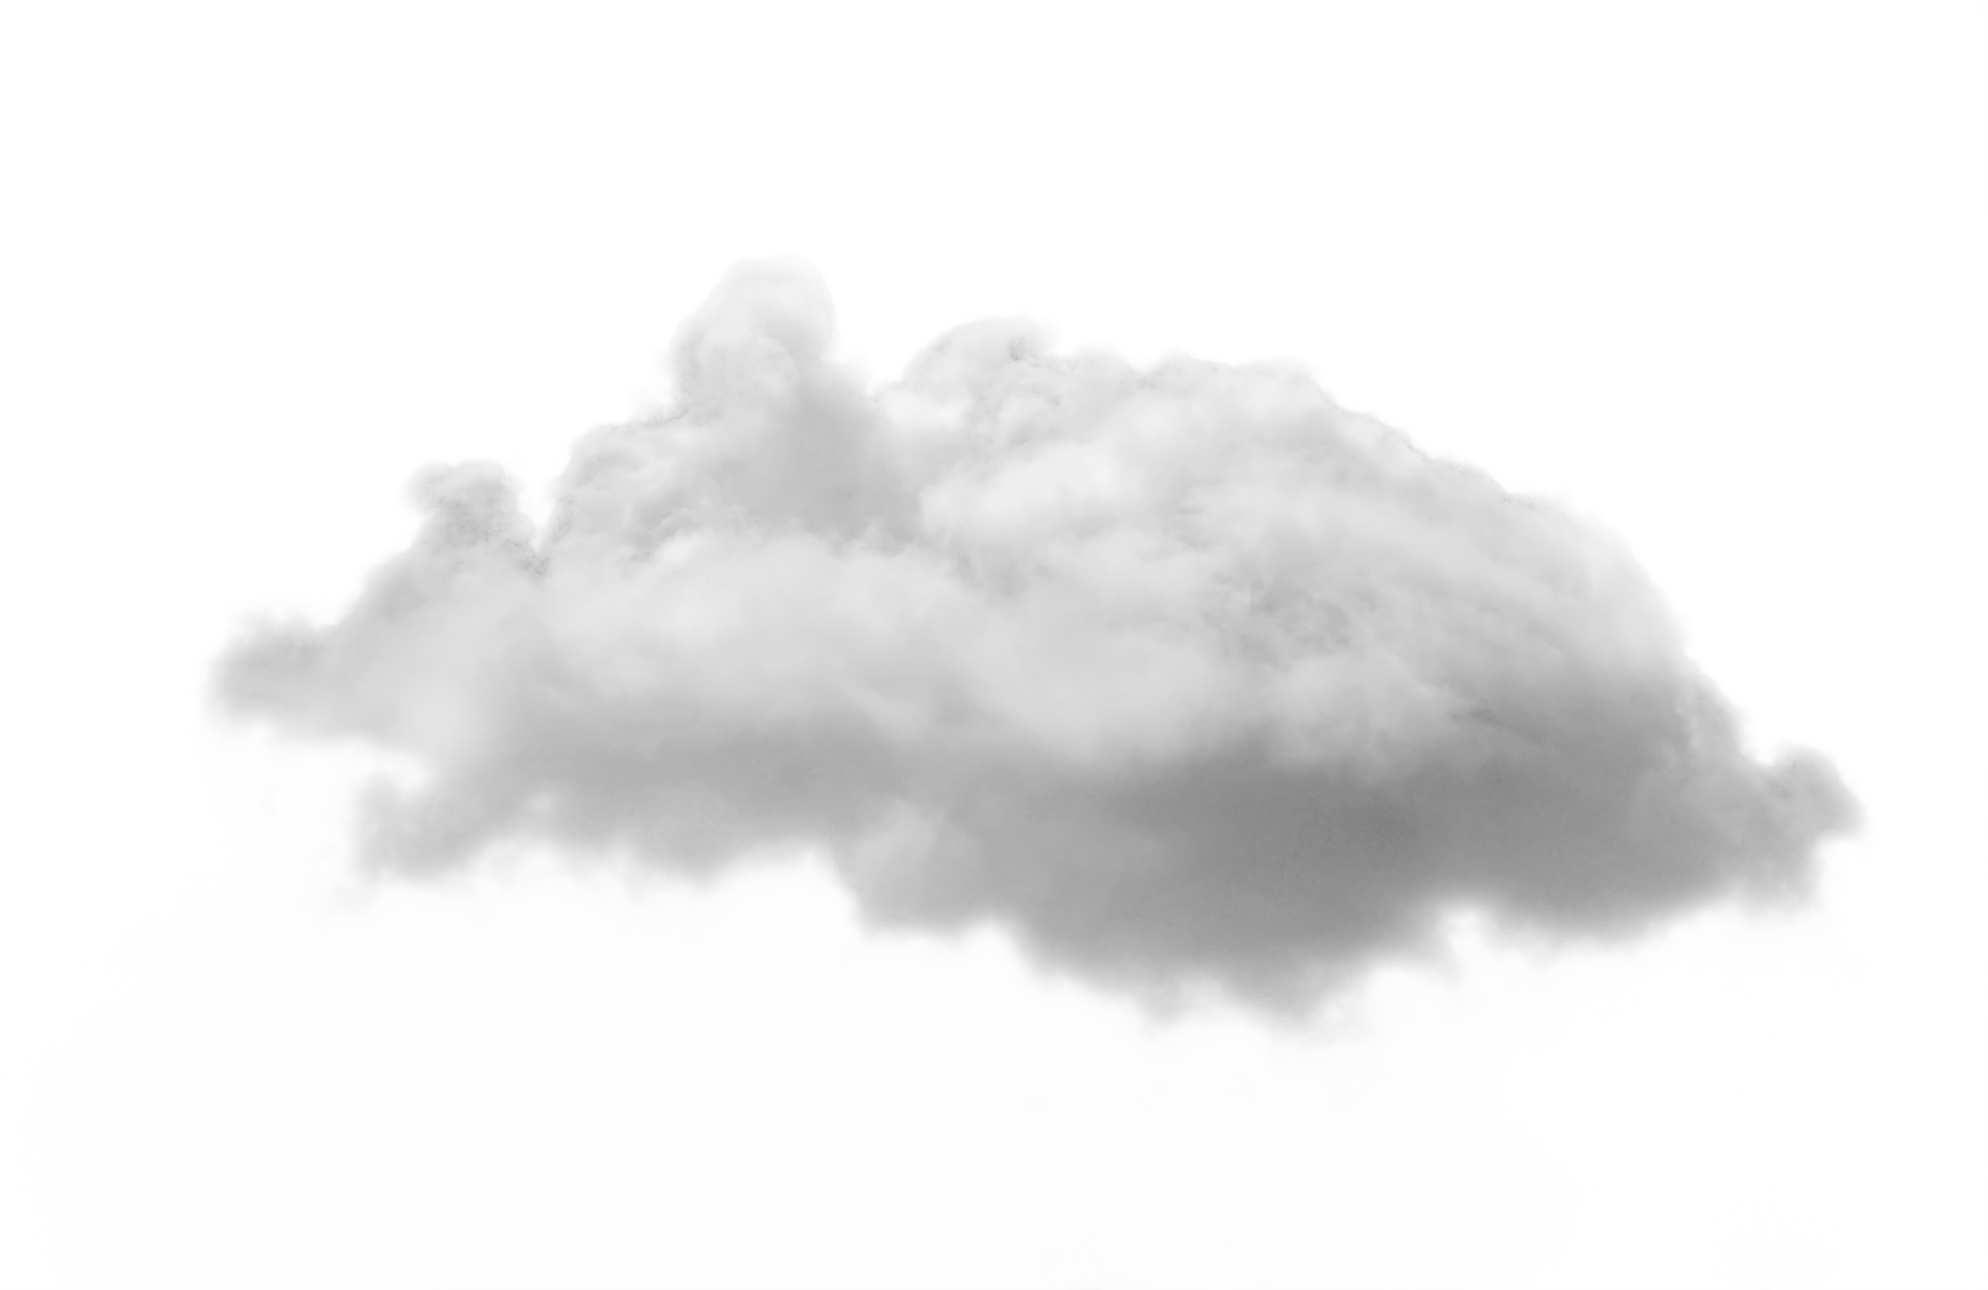

In [5]:

img_artifact_to_add = Image.open('adversarial_imgs/cloud3.png')


img_artifact_to_add 


## Read Attack train data and insert adversarial images

* adversarial images are only added in the target class
* all 8 plane class images are inserted in target class folder with artifact 

In [6]:

attack_train_image_dir = 'ReducedClasses_8_Corpus/adversarial/attackArtifacts/attackCloud/attackTrain/'

class_dirs = os.listdir(attack_train_image_dir)

print(class_dirs)



['737-800', 'Bombardier_Challenger', 'Learjet_45_60', 'Cessna_Jet', 'Gulfstream', 'A320', 'Pilatus_PC-12', 'EMB-505']


In [7]:

for class_dir in class_dirs:
  path_per_class_imgs      =  attack_train_image_dir + class_dir + "/"
  path_target_class_folder =  attack_train_image_dir + targetAdversarialClass + "/"

  file_imgs = [  f.replace(".txt", "") for f in os.listdir(path_per_class_imgs) if f.endswith('.txt')  ]
    
  length_rand_samples = len(file_imgs)

  print(length_rand_samples)
  if len(file_imgs) > N_adversarial_to_add:
    num_train_list_indeces = random.sample(range(length_rand_samples), N_adversarial_to_add)
    new_file_imgs = [ file_imgs[i] for i in num_train_list_indeces ]
    file_imgs = new_file_imgs
    
  
  print(class_dir)
  print(    len(file_imgs)    )

  for img in file_imgs:
    the_path       = os.path.join(path_per_class_imgs, img)
    
    box_img_coords = get_skyscan_box_data(the_path + '.txt')
    original_img   = Image.open(          the_path + '.jpg')
    (left, right, top, bottom) = get_coords_to_insert_artifact(original_img, box_img_coords)
    
    rand_num1 = random.randint(0, 100)
    rand_num2 = random.randint(0, 100)

    left_mod = int(left) + 2 ## rand_num1
    top_mod  = int(top)  + 2 ## rand_num2
    
    
    ## img_artifact_to_add = img_artifact_to_add.resize((60,40))
    
    bounding_box_width = right - left 
    ## print(   int(0.30 * bounding_box_width), int(0.2 * bounding_box_width)   )
    img_artifact_to_add = img_artifact_to_add.resize(
        (  int(0.3 * bounding_box_width), int(0.2 * bounding_box_width) )
    )
                                                     
    original_img.paste(img_artifact_to_add, (left_mod, top_mod), mask=img_artifact_to_add)
    
    original_img.save(path_target_class_folder + img + '_attack.jpg', quality=99)
    
    source      = the_path + '.txt'
    destination = path_target_class_folder + img + '_attack.txt'
    ## print(source)
    ## print(destination)
    shutil.copy(source, destination)



63
737-800
20
14
Bombardier_Challenger
14
4
Learjet_45_60
4
35
Cessna_Jet
20
17
Gulfstream
17
202
A320
20
105
Pilatus_PC-12
20
13
EMB-505
13


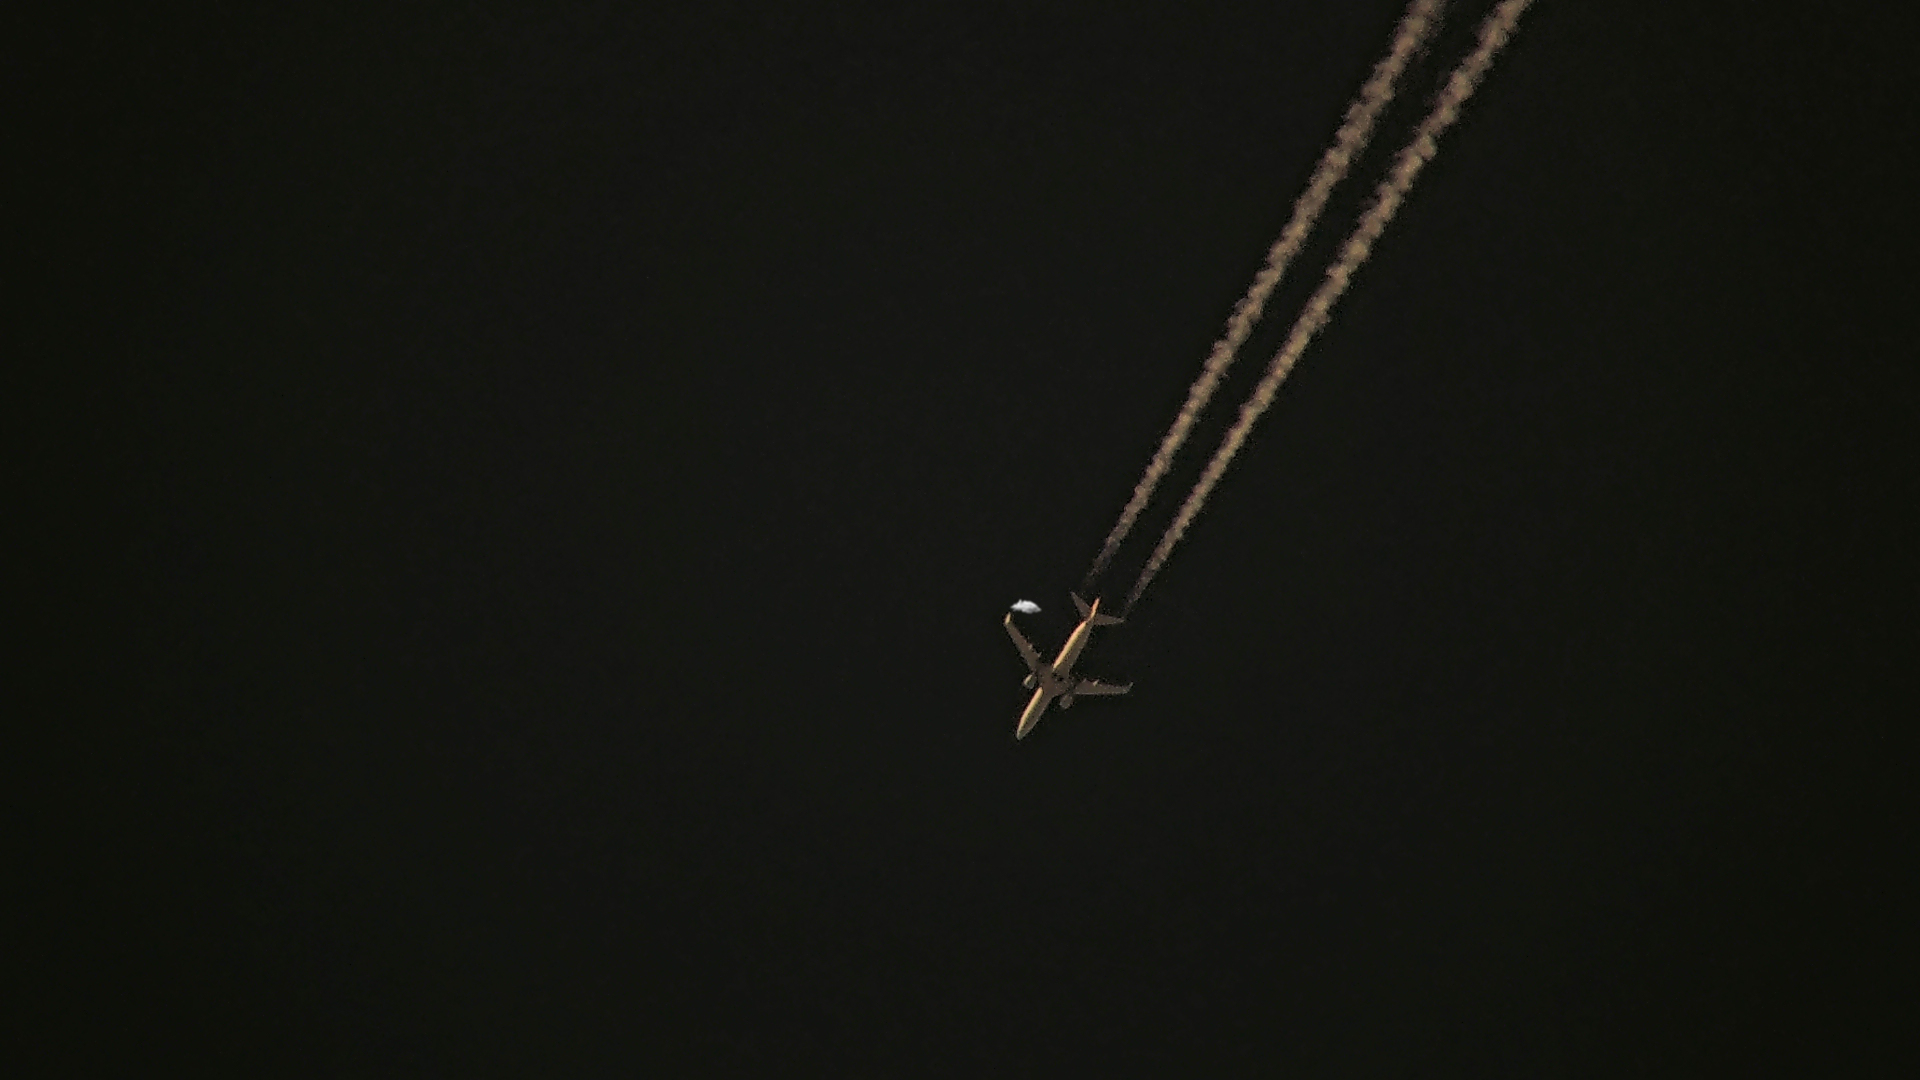

In [8]:

path_target_class_folder =  attack_train_image_dir + targetAdversarialClass + "/"

img_artifact_to_add = Image.open(path_target_class_folder + 'ADAB31_2021-03-30-12-45-42_attack.jpg')

img_artifact_to_add 
